# ***Business Understanding***
- Analyze to USD stock and predict the USD stock as per date.

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [36]:
df = pd.read_csv("dc.csv")
df.head()

Unnamed: 0       open_SAR  open_USD       high_SAR  high_USD  \
0  2021-01-30  128437.248512  34246.28  131012.723200  34933.00   
1  2021-01-29  125144.022272  33368.18  144510.037760  38531.90   
2  2021-01-28  113870.357376  30362.19  126703.438592  33783.98   
3  2021-01-27  121753.023104  32464.01  122102.860416  32557.29   
4  2021-01-26  120966.114176  32254.19  123470.218752  32921.88   

         low_SAR   low_USD      close_SAR  close_USD  volume  
0  123106.880000  32825.00  128333.212416   34218.54   43072  
1  119695.516160  31915.40  128459.450880   34252.20  231827  
2  111919.811840  29842.10  125131.570944   33364.86   92621  
3  109668.146688  29241.72  113885.208960   30366.15   95911  
4  115652.472448  30837.37  121767.124608   32467.77   84972

# ***Data Understanding***

In [6]:
df.shape

(1000, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   object 
 1   open_SAR    1000 non-null   float64
 2   open_USD    1000 non-null   float64
 3   high_SAR    1000 non-null   float64
 4   high_USD    1000 non-null   float64
 5   low_SAR     1000 non-null   float64
 6   low_USD     1000 non-null   float64
 7   close_SAR   1000 non-null   float64
 8   close_USD   1000 non-null   float64
 9   volume      1000 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 78.3+ KB


In [9]:
df.describe().T

count          mean           std           min           25%  \
open_SAR   1000.0  34825.322255  21728.028028  12045.197184  24254.558752   
open_USD   1000.0   9285.762120   5793.522832   3211.710000   6467.192500   
high_SAR   1000.0  35789.618165  22785.946842  12288.185600  24686.089152   
high_USD   1000.0   9542.880270   6075.604427   3276.500000   6582.255000   
low_SAR    1000.0  33796.329057  20565.410145  11837.237504  23721.336256   
low_USD    1000.0   9011.393200   5483.524463   3156.260000   6325.015000   
close_SAR  1000.0  34917.483572  21928.280072  12045.234688  24252.946080   
close_USD  1000.0   9310.335850   5846.917681   3211.720000   6466.762500   
volume     1000.0  53100.498000  35329.832031   5743.000000  30045.750000   

                    50%           75%            max  
open_SAR   30714.632128  38317.311744  152217.334784  
open_USD    8189.695000  10216.860000   40586.960000  
high_SAR   31321.953152  39077.527200  157329.280000  
high_USD    8351.630000  10419.562500   41950.000000  
low_SAR    30010.869568  37158.878816  145215.488000  
low_USD     8002.045000   9907.977500   38720.000000  
close_SAR  30713.263232  38329.725568  152201.770624  
close_USD   8189.330000  10220.170000   40582.810000  
volume     43795.500000  64909.250000  402201.000000

In [37]:
# Resort Data

df.sort_values(by = "Unnamed: 0", inplace = True)

In [38]:
# Set Date Column as index

df["Unnamed: 0"] = pd.to_datetime(df["Unnamed: 0"])
df.set_index("Unnamed: 0", inplace = True)

In [39]:
df.head()

open_SAR  open_USD      high_SAR  high_USD       low_SAR  \
Unnamed: 0                                                                 
2018-05-07  36232.689408   9661.02  36340.138368   9689.67  34432.422400   
2018-05-08  35122.496000   9365.00  35537.665280   9475.70  33980.649216   
2018-05-09  34421.171200   9178.00  35216.256000   9390.00  33622.336000   
2018-05-10  34916.224000   9310.00  35235.458048   9395.12  33641.088000   
2018-05-11  33761.888384   9002.21  33816.606720   9016.80  31282.086400   

            low_USD     close_SAR  close_USD  volume  
Unnamed: 0                                            
2018-05-07  9181.00  35122.496000    9365.00   33787  
2018-05-08  9060.54  34457.025024    9187.56   25533  
2018-05-09  8965.00  34916.224000    9310.00   25673  
2018-05-10  8970.00  33761.850880    9002.20   25055  
2018-05-11  8341.00  31503.360000    8400.00   48227

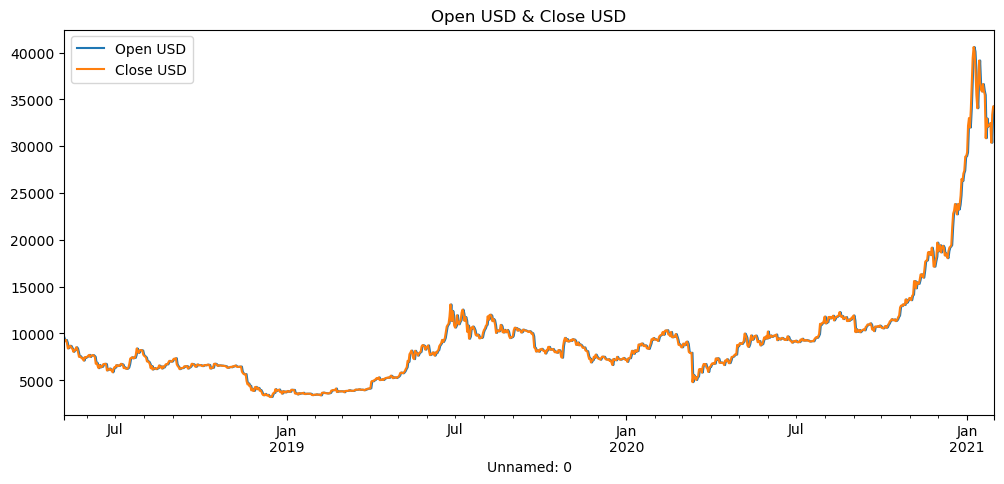

<Figure size 640x480 with 0 Axes>

In [27]:
plt.figure(figsize = (12, 5))
df["open_USD"].plot()
df["close_USD"].plot()
plt.title("Open USD & Close USD")
plt.legend(["Open USD", "Close USD"])
plt.show()
plt.tight_layout()

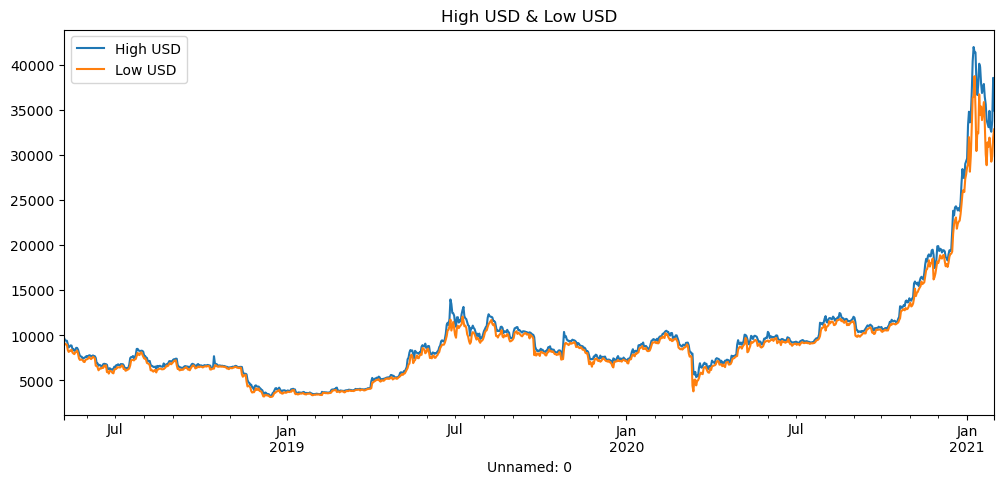

<Figure size 640x480 with 0 Axes>

In [28]:
plt.figure(figsize = (12, 5))
df["high_USD"].plot()
df["low_USD"].plot()
plt.title("High USD & Low USD")
plt.legend(["High USD", "Low USD"])
plt.show()
plt.tight_layout()

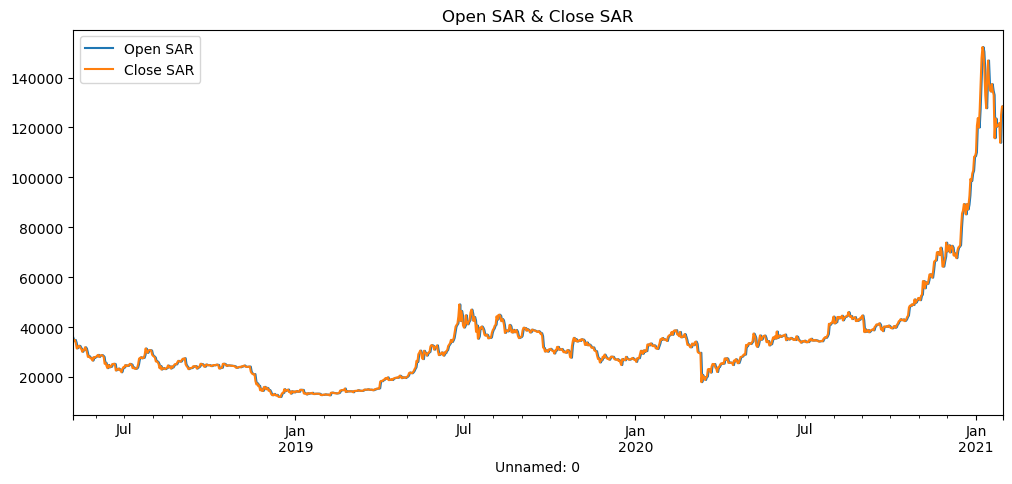

<Figure size 640x480 with 0 Axes>

In [29]:
plt.figure(figsize = (12, 5))
df["open_SAR"].plot()
df["close_SAR"].plot()
plt.title("Open SAR & Close SAR")
plt.legend(["Open SAR", "Close SAR"])
plt.show()
plt.tight_layout()

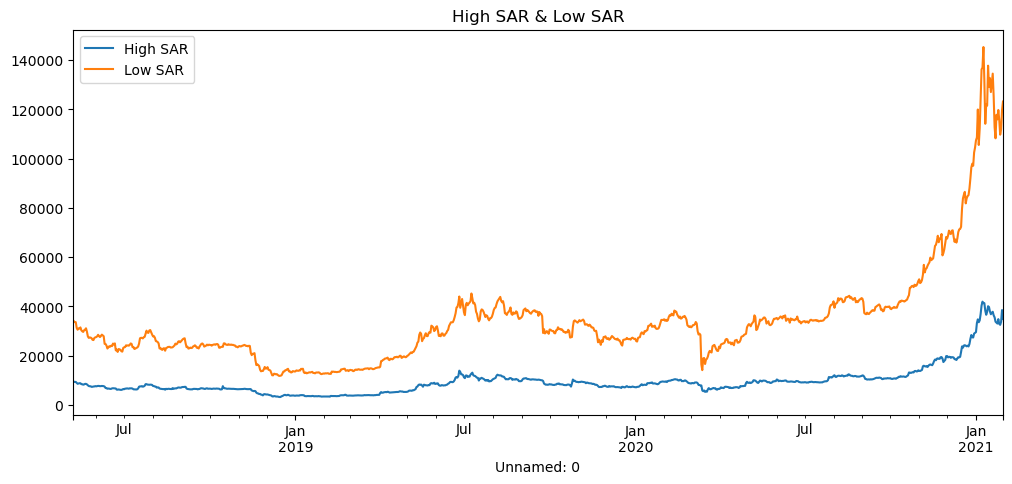

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure(figsize = (12, 5))
df["high_USD"].plot()
df["low_SAR"].plot()
plt.title("High SAR & Low SAR")
plt.legend(["High SAR", "Low SAR"])
plt.show()
plt.tight_layout()

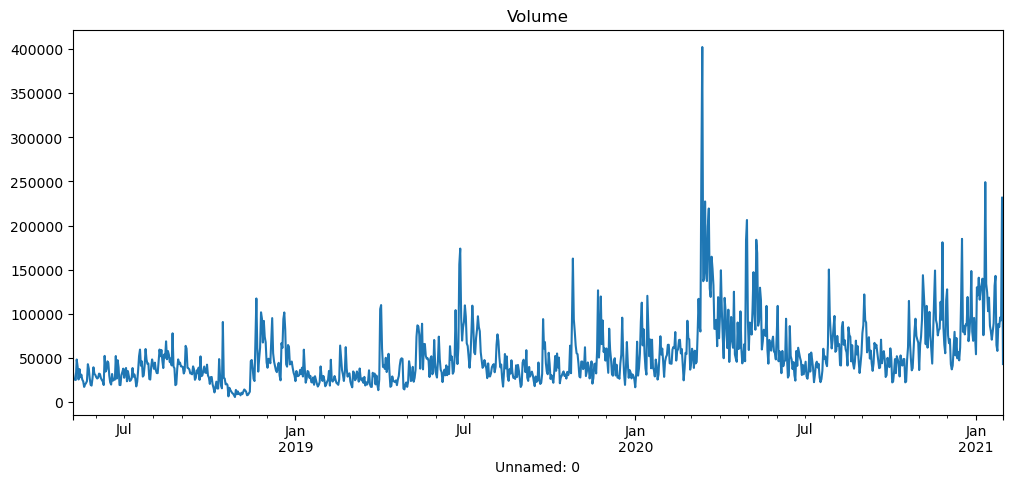

<Figure size 640x480 with 0 Axes>

In [32]:
plt.figure(figsize = (12, 5))
df["volume"].plot()
plt.title("Volume")
plt.show()
plt.tight_layout()

# Choosing Prediction Column

In [40]:
df.head(2)

open_SAR  open_USD      high_SAR  high_USD       low_SAR  \
Unnamed: 0                                                                 
2018-05-07  36232.689408   9661.02  36340.138368   9689.67  34432.422400   
2018-05-08  35122.496000   9365.00  35537.665280   9475.70  33980.649216   

            low_USD     close_SAR  close_USD  volume  
Unnamed: 0                                            
2018-05-07  9181.00  35122.496000    9365.00   33787  
2018-05-08  9060.54  34457.025024    9187.56   25533

In [47]:
df1 = df["close_USD"]
df1 = pd.DataFrame(df1)
data = df1.values
data.shape

(1000, 1)

In [51]:
# Normalization

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled_data = sc.fit_transform(data)

In [62]:
# Splitting the data 75% train data and 25% test data

train_size = int(len(data)*0.75)
test_size = len(data) - train_size
print(f"Train size :{train_size} and Test size : {test_size}")

Train size :750 and Test size : 250


In [63]:
train_data = scaled_data[0:train_size:]
train_data.shape

(750, 1)

In [71]:
# Creating a training set with 60 timesteps

X_train = []
y_train = []
timesteps = 60
n_cols = 1

for i in range(timesteps, len(train_data)):
    X_train.append(train_data[i - timesteps: i, :n_cols])
    y_train.append(train_data[i, :n_cols])
    if i<= timesteps:
        print("X_train", X_train)
        print("y_train", y_train)

X_train [array([[0.16465348],
       [0.15990542],
       [0.16318175],
       [0.15494544],
       [0.13883138],
       [0.14059585],
       [0.14631604],
       [0.145878  ],
       [0.14049042],
       [0.13695827],
       [0.12923733],
       [0.13454491],
       [0.1343758 ],
       [0.14222919],
       [0.13832939],
       [0.12751541],
       [0.11480077],
       [0.11675576],
       [0.11359797],
       [0.11030559],
       [0.11044018],
       [0.10401837],
       [0.11371277],
       [0.11142945],
       [0.11434748],
       [0.11531079],
       [0.11849561],
       [0.1204819 ],
       [0.11440073],
       [0.11809342],
       [0.11899894],
       [0.11986164],
       [0.11751651],
       [0.1145273 ],
       [0.09508072],
       [0.09794416],
       [0.0887927 ],
       [0.08244501],
       [0.09162858],
       [0.08501705],
       [0.08756127],
       [0.08664157],
       [0.09367508],
       [0.0944444 ],
       [0.0949876 ],
       [0.0938458 ],
       [0.07581475],
    

In [76]:
# Convert to numpy array

X_train, y_train = np.array(X_train), np.array(y_train)

In [84]:
# Reshaping the input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], n_cols))

In [88]:
X_train.shape, y_train.shape

((690, 60, 1), (690, 1))

# Building and Traing the RNN

In [141]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

In [182]:
model = Sequential()
# Adding first LSTM Layer and some Dropout regularization
model.add(LSTM(units = 50, return_sequences = False, input_shape = (X_train.shape[1], n_cols)))
model.add(Dropout(0.2))

# Adding output layer
model.add(Dense(units = 1))
model.compile(optimizer = "adam", loss = "mse", metrics = ["mean_absolute_error"])
score = model.fit(X_train, y_train, epochs = 60, batch_size = 32)

Epoch 1/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0045 - mean_absolute_error: 0.0527
Epoch 2/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 8.3066e-04 - mean_absolute_error: 0.0223
Epoch 3/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.3055e-04 - mean_absolute_error: 0.0166
Epoch 4/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4.1867e-04 - mean_absolute_error: 0.0144
Epoch 5/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.9703e-04 - mean_absolute_error: 0.0135
Epoch 6/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.7348e-04 - mean_absolute_error: 0.0142
Epoch 7/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.6338e-04 - mean_absolute_error: 0.0136
Epoch 8/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.9534e-04 - mean_absolute_error: 0.0125
Epoch 9/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.9027e-04 - mean_absolute_error: 0.0127
Epoch 10/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.1052e-04 - mean_absolute_error: 0.0125
Epo

With first LSTM layer and output we got lowest mae upto = 0.0016 within epochs = 16. After that mae becomes somewhat constant.

In [184]:
model1 = Sequential()
# Adding first LSTM Layer and some Dropout regularization
model1.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], n_cols)))
model1.add(Dropout(0.2))

# Adding 2nd LSTM layer and some dropout
model1.add(LSTM(units = 50, return_sequences = False))
model1.add(Dropout(0.2))

# Adding output layer
model1.add(Dense(units = 1))
model1.compile(optimizer = "adam", loss = "mse", metrics = ["mean_absolute_error"])
model1.fit(X_train, y_train, epochs = 60, batch_size = 32)

Epoch 1/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0055 - mean_absolute_error: 0.0572
Epoch 2/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 7.9497e-04 - mean_absolute_error: 0.0230
Epoch 3/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 5.3759e-04 - mean_absolute_error: 0.0169
Epoch 4/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 5.1575e-04 - mean_absolute_error: 0.0162
Epoch 5/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 4.8333e-04 - mean_absolute_error: 0.0160
Epoch 6/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 3.9565e-04 - mean_absolute_error: 0.0149
Epoch 7/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 4.2825e-04 - mean_absolute_error: 0.0153
Epoch 8/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 4.0835e-04 - mean_absolute_error: 0.0143
Epoch 9/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 3.5323e-04 - mean_absolute_error: 0.0138
Epoch 10/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 3.5047e-04 - mean_absolute_error: 0.0135
Epo

Again we are getting somewhat same mae value which indicates that model with 1 LSTM is sufficient but once we try with 3rd layer.

In [185]:
model2 = Sequential()
# Adding first LSTM Layer and some Dropout regularization
model2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], n_cols)))
model2.add(Dropout(0.2))

# Adding 2nd LSTM layer and some dropout
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))

# Adding 3nd LSTM layer and some dropout
model2.add(LSTM(units = 50, return_sequences = False))
model2.add(Dropout(0.2))


# Adding output layer
model2.add(Dense(units = 1))
model2.compile(optimizer = "adam", loss = "mean_squared_error")
model2.fit(X_train, y_train, epochs = 60, batch_size = 32)

Epoch 1/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0065
Epoch 2/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 9.2863e-04
Epoch 3/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 5.8025e-04
Epoch 4/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 6.1329e-04
Epoch 5/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 6.2254e-04
Epoch 6/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 5.5462e-04
Epoch 7/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 5.4125e-04
Epoch 8/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 5.4162e-04
Epoch 9/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 4.8315e-04
Epoch 10/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 4.4980e-04
Epoch 11/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 5.2685e-04
Epoch 12/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 5.1976e-04
Epoch 13/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 3.6572e-04
Epoch 14/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 4.0529e-04
Epoch 15/60
22/22 ━

Using 3rd LSTM layer increases the mae. Hence choosing 1st LSTM layer is considerable.

# Model Evaluation

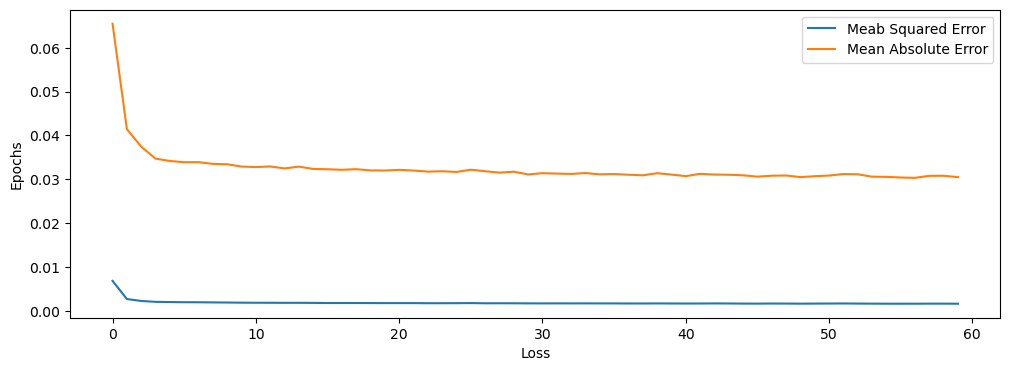

In [156]:
plt.figure(figsize = (12, 4))
plt.plot(score.history["loss"])
plt.plot(score.history["mean_absolute_error"])
plt.legend(["Meab Squared Error", "Mean Absolute Error"])
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.show()

In [195]:
pred = model.predict(X_train)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [196]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train, pred))

0.01005692930290433

# Prediction

In [186]:
timesteps = 60
test_data = scaled_data[train_size - timesteps:,:]

In [188]:
test_data.shape

(310, 1)

In [189]:
# Creating testing set with 60 timesteps and 1 output

X_test = []
y_test = []
n_cols = 1

for i in range(timesteps, len(test_data)):
    X_test.append(test_data[i - timesteps: i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], n_cols))

In [190]:
X_test.shape, y_test.shape

((250, 60, 1), (250, 1))

In [198]:
test_prediction = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [208]:
np.sqrt(mean_squared_error(y_test, test_prediction))

0.03915885268684593

In [205]:
test_pred_result = sc.inverse_transform(test_prediction)
actual_test_result = sc.inverse_transform(y_test)

In [209]:
final_result = pd.DataFrame(data = {"Predictions": test_pred_result.flatten(), "Actuals": actual_test_result.flatten()})
final_result

Predictions   Actuals
0     8826.665039   8841.18
1     8758.422852   9204.07
2     8851.473633   9575.89
3     9088.392578   9427.07
4     9256.938477   9697.72
..            ...       ...
245  29355.007812  32467.77
246  29636.968750  30366.15
247  29117.650391  33364.86
248  29773.888672  34252.20
249  30742.347656  34218.54

[250 rows x 2 columns]

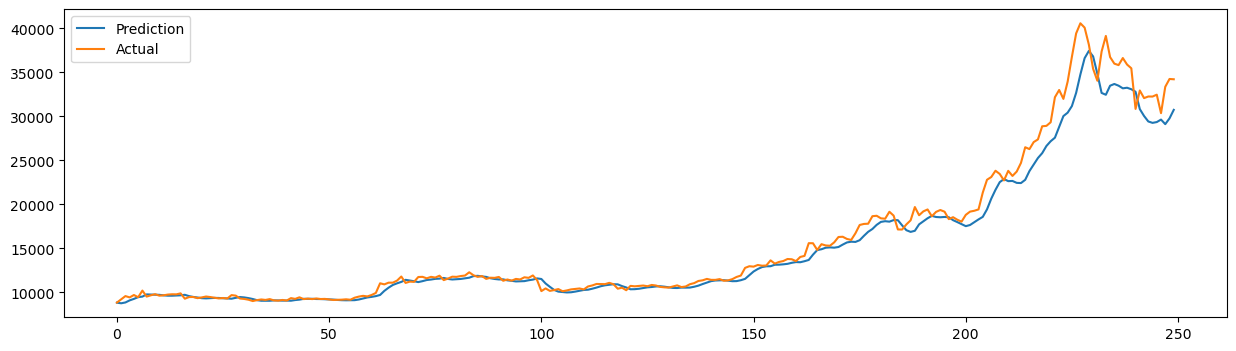

In [212]:
plt.figure(figsize = (15, 4))
plt.plot(final_result["Predictions"])
plt.plot(final_result["Actuals"])
plt.legend(["Prediction", "Actual"])
plt.show()

In [217]:
train = df1.iloc[:train_size, 0:1]
test = df1.iloc[train_size: , 0:1]
test["Prediction"] = test_pred_result

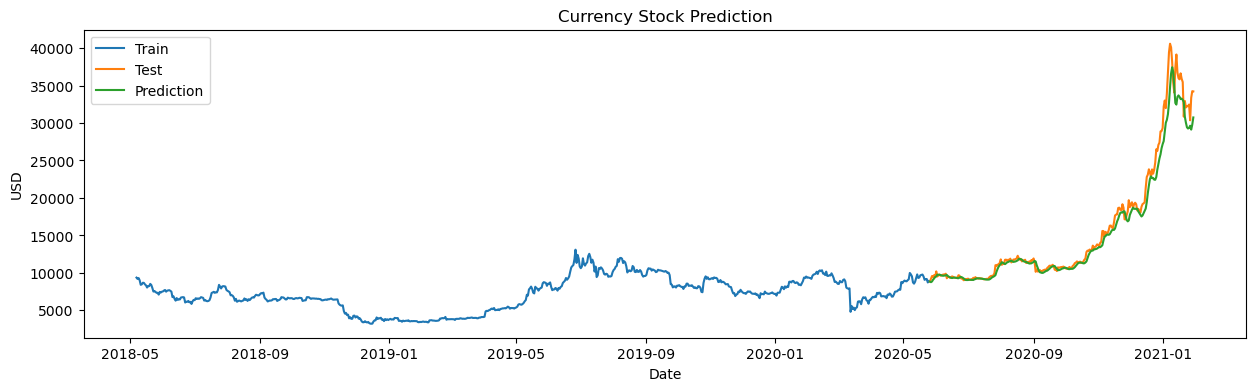

In [223]:
plt.figure(figsize = (15, 4))
plt.plot(train["close_USD"])
plt.plot(test["close_USD"])
plt.plot(test["Prediction"])
plt.title("Currency Stock Prediction")
plt.xlabel("Date")
plt.ylabel("USD")
plt.legend(["Train", "Test", "Prediction"])
plt.show()

As per graph , we can clearly see that model is predicting according to actual data with some minor differences. Overall model is predicting well.